<a href="https://colab.research.google.com/github/Vamshikrishnaah/VamshiKrishnah/blob/main/Vamshi_Krishna(Q1101196)_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/'Vamshi AI Datasets'/
%ls

/content/drive/MyDrive/Vamshi AI Datasets
 boston.csv                  Mall_Customers.csv
 breast_cancer_dataset.csv   ML_Customers.xlsx
 churn.csv                   mse_comparison.png
 Customers.csv               Natural_Language_Processing_Text.txt
'Decision Tree.ipynb'        r2_comparison.png
 employees_info.csv          Telco-Customer-Churn-.csv
 heart_disease_.csv          test_set.csv
 mae_comparison.png         'Vamshi creditcard.csv'


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV


#  **Load Data**

In [45]:
# Load data
data = pd.read_csv("breast_cancer_dataset.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Task 1: Data** **Exploration**

In [46]:
#checking dimensions
data.shape

(569, 32)

In [47]:
#checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [48]:
# Investigate distribution of target variable
target_distribution = data['diagnosis'].value_counts()
print("Target Distribution:\n", target_distribution)

# Generate basic statistics for numerical features
numerical_data = data.drop(columns=['id', 'diagnosis'])
statistics = numerical_data.describe().T
print("\nBasic Statistics:\n", statistics)

Target Distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64

Basic Statistics:
                          count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.3602

In [49]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n",missing_values)

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### **Visualizations**

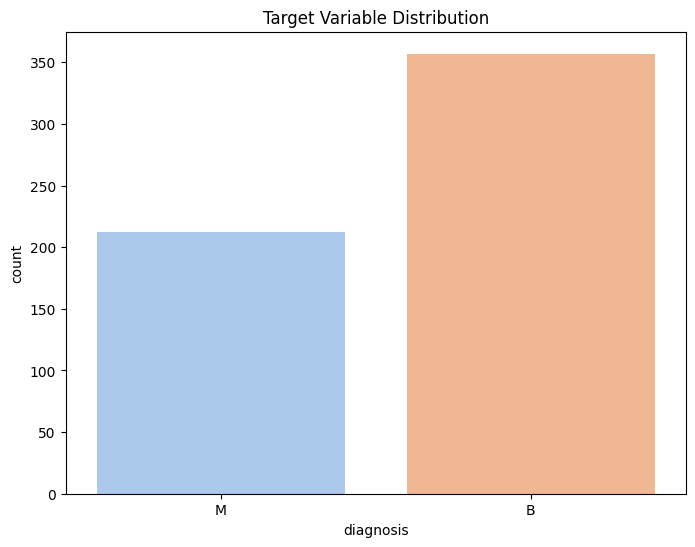

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, hue='diagnosis', legend=False, palette='pastel')
plt.title('Target Variable Distribution')
plt.show()

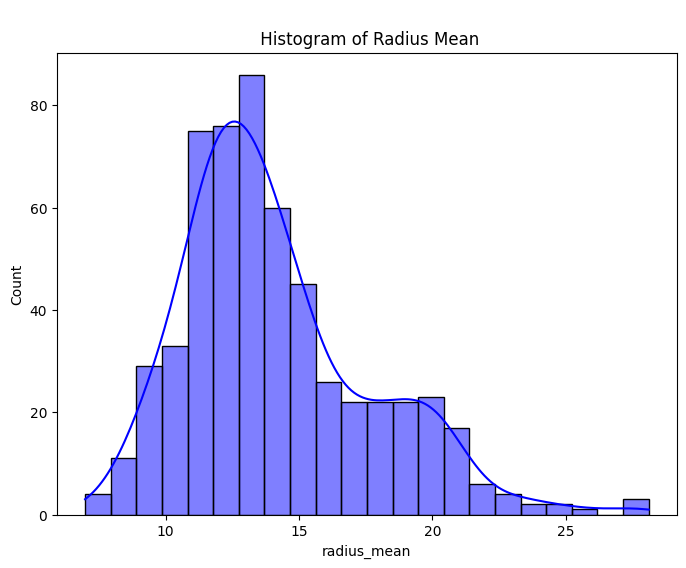

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(data=numerical_data['radius_mean'], kde=True, color='blue')
plt.title('\n Histogram of Radius Mean')
plt.show()

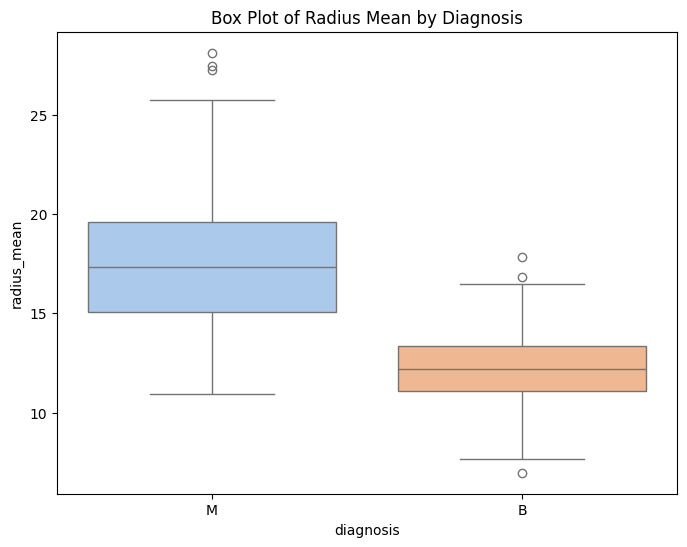

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data, hue='diagnosis', legend=False, palette='pastel')
plt.title('Box Plot of Radius Mean by Diagnosis')
plt.show()

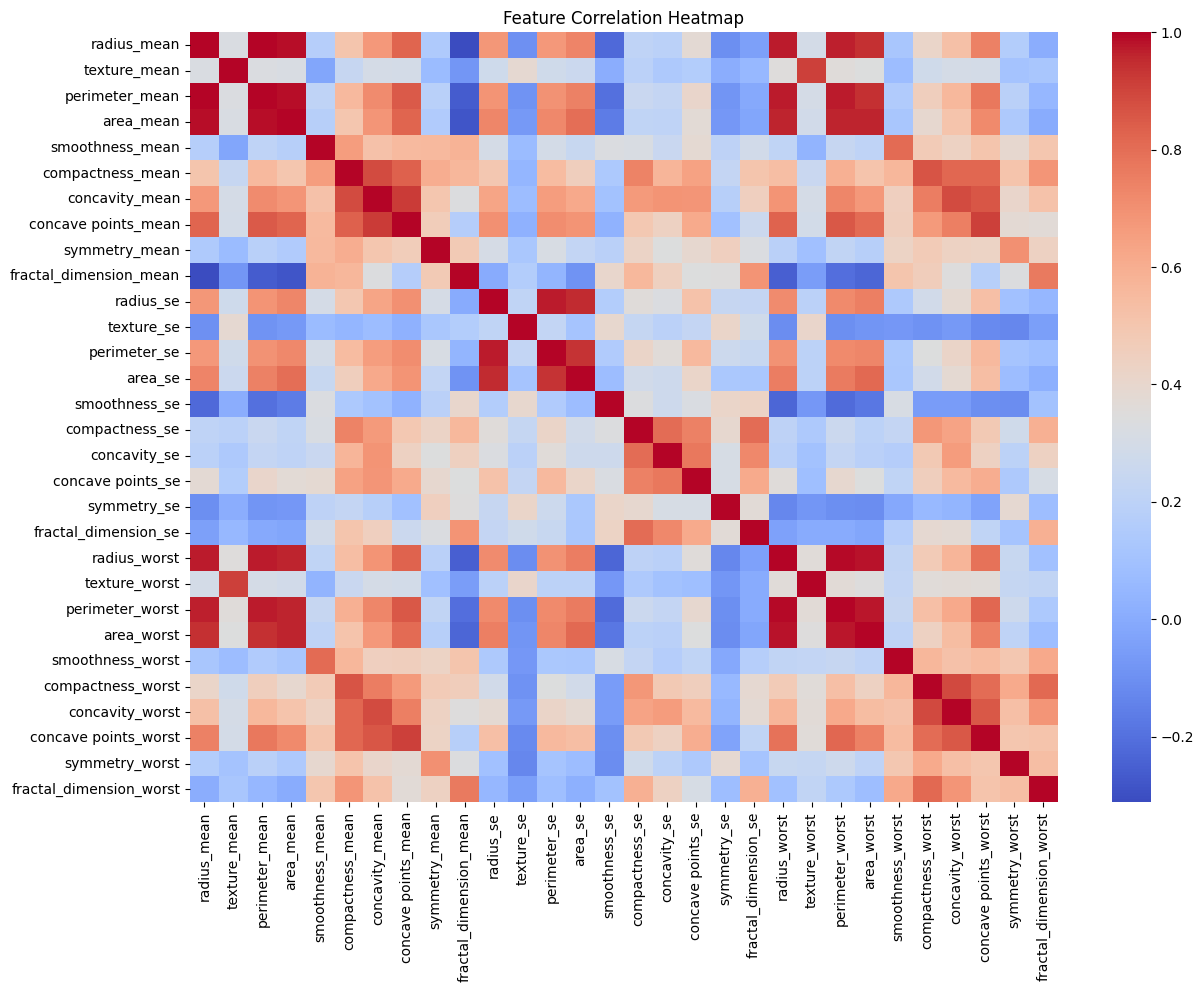

Correlations with Target:
 radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
c

In [54]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Correlation with the target (encoded)
le = LabelEncoder()
data['diagnosis_encoded'] = le.fit_transform(data['diagnosis'])
correlations_with_target = data.drop(columns=['id', 'diagnosis']).corr()['diagnosis_encoded']
print("Correlations with Target:\n", correlations_with_target)

# Task 2: Data Preparation

In [55]:
# Assign diagnosis as the target variable
X = numerical_data
y = data['diagnosis_encoded']

# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values)

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Missing Values:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# **Task 3: Model Training**

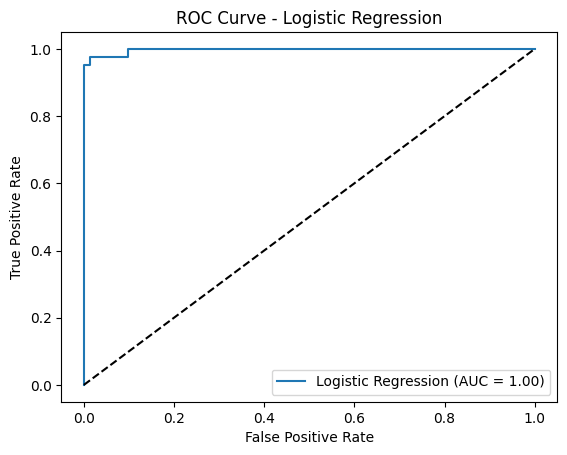

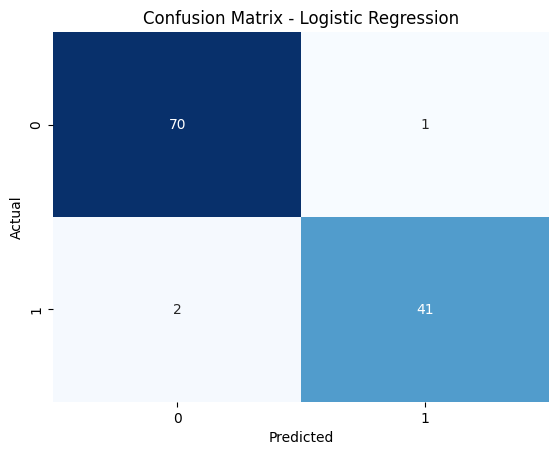

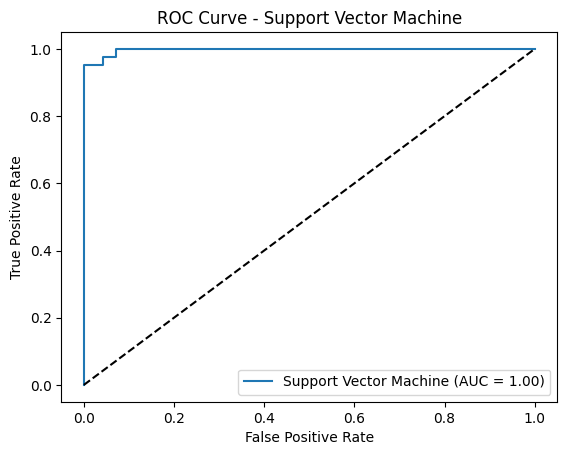

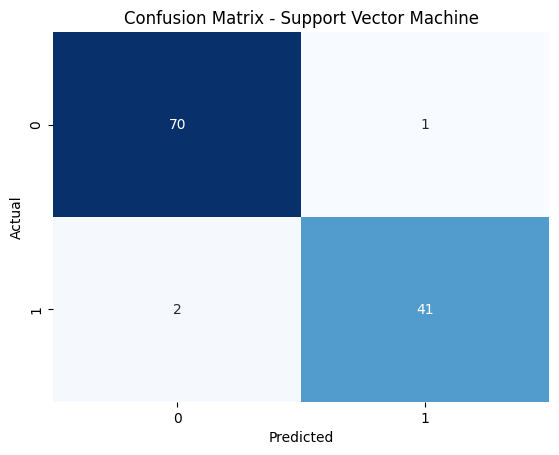

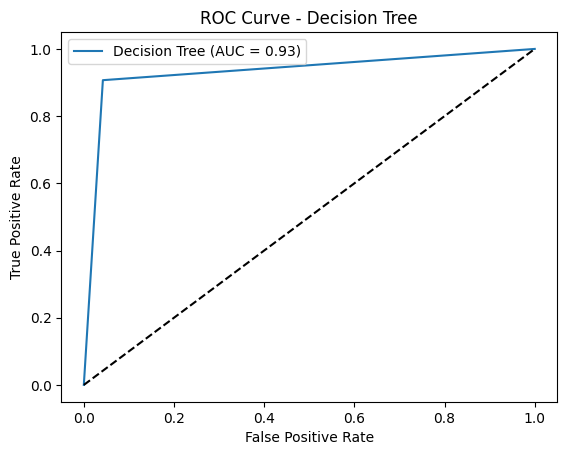

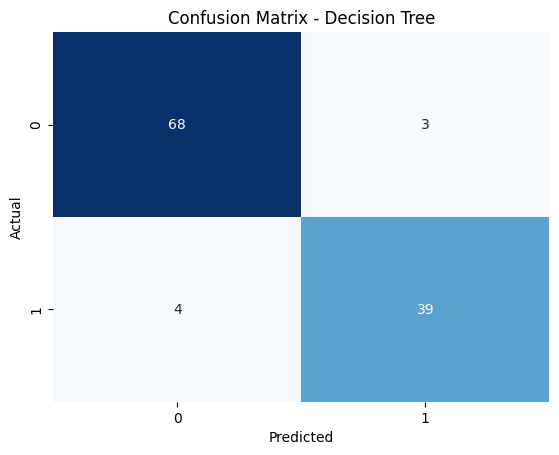

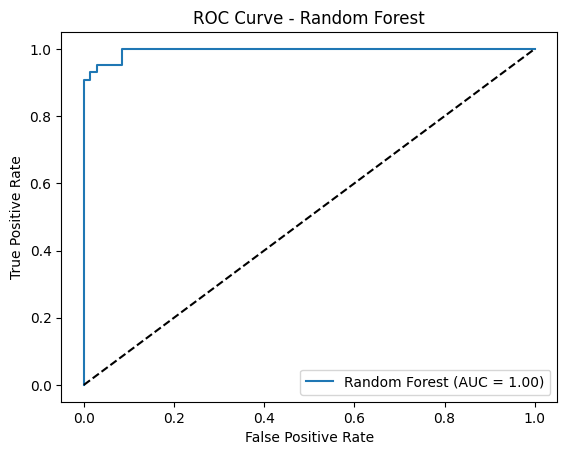

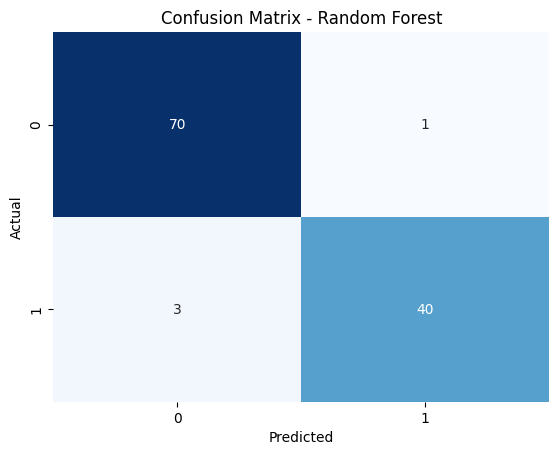

In [56]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
    }
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        metrics['AUC'] = roc_auc

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure()
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        results[name] = metrics

# **Task 4: Model Evaluation Results**

In [63]:
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)

# Select top model for fine-tuning (example: Random Forest)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Post-tuning performance
y_pred_tuned = best_rf.predict(X_test)
y_pred_proba_tuned = best_rf.predict_proba(X_test)[:, 1]
tuned_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1-Score': f1_score(y_test, y_pred_tuned),
    'AUC': auc(*roc_curve(y_test, y_pred_proba_tuned)[:2])
}

print("\n\n Post-tuning Performance:\n", tuned_metrics)

# Compare pre- and post-tuning performance
print("\nComparison:\n", pd.DataFrame({'Pre-Tuning': results['Random Forest'], 'Post-Tuning': tuned_metrics}))

Model Performance:
                         Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression     0.973684   0.976190  0.953488  0.964706  0.997380
Support Vector Machine  0.973684   0.976190  0.953488  0.964706  0.997380
Decision Tree           0.938596   0.928571  0.906977  0.917647  0.932362
Random Forest           0.964912   0.975610  0.930233  0.952381  0.995087


 Post-tuning Performance:
 {'Accuracy': 0.9649122807017544, 'Precision': 0.975609756097561, 'Recall': 0.9302325581395349, 'F1-Score': 0.9523809523809523, 'AUC': np.float64(0.995250573206682)}

Comparison:
            Pre-Tuning  Post-Tuning
Accuracy     0.964912     0.964912
Precision    0.975610     0.975610
Recall       0.930233     0.930233
F1-Score     0.952381     0.952381
AUC          0.995087     0.995251
